### H5 - Sentiment Analysis

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pickle import load, dump
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [128]:
clean_data_folder = "../clean_data"
filenames = os.listdir(clean_data_folder)
os.listdir(clean_data_folder)

with open(clean_data_folder+"/pickleall_data.pkl", "rb") as f: 
    all_scripts = load(f)

In [129]:
all_scripts['episode_str']=all_scripts['episode'].apply(
    lambda x: '0'+str(x) if len(str(x))==1 else str(x))
all_scripts['season_episode_no'] = all_scripts['season'].apply(
    lambda x: str(x))+all_scripts['episode_str']
all_scripts['season_episode_no'] = all_scripts['season_episode_no'].apply(
    lambda x: int(x))

In [130]:
from afinn import Afinn
afn = Afinn(emoticons=True)
afinn_wl_url = ('https://raw.githubusercontent.com'
                '/fnielsen/afinn/master/afinn/data/AFINN-111.txt')
afinn_wl_df = pd.read_csv(afinn_wl_url,
                          header=None, # no column names
                          sep='\t',  # tab sepeated
                          names=['term', 'value']) #new column names
seed = 808 # seed for sample so results are stable
afinn_wl_df.sample(15, random_state = seed)

,term,value
1852,regret,-2
1285,indifferent,-2
681,disappoints,-2
770,doubts,-1
1644,outmaneuvered,-2
55,admit,-1
1133,haha,3
1160,haunt,-1
2435,wishing,1
21,abused,-3


In [131]:
def set_sentiment(score):
    if score==0:
        sentiment='neutral'
    elif score<0:
        sentiment='negative'
    elif score>0:
        sentiment='positiv'
    return sentiment


In [132]:
#sentiment for top 5 characters in all seasons
jack_o_neill= all_scripts[all_scripts.character=='jack_o_neill']

In [133]:
jack_o_neill['text']=jack_o_neill.text.apply(
    lambda x: ' '.join(x))
jack_o_neill['sentiment_score']=jack_o_neill.text.apply(
    lambda x: afn.score(x))

In [134]:
avg_jack=jack_o_neill.sentiment_score.mean()
avg_jack

0.09258450519696043

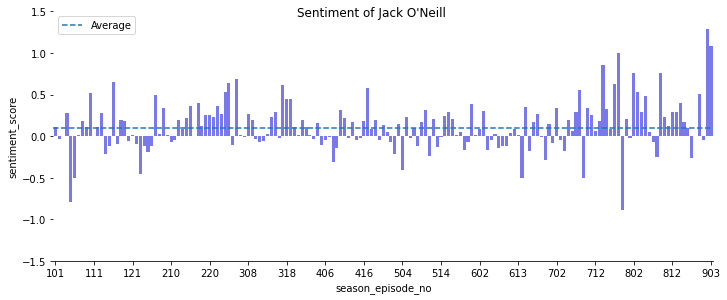

In [135]:
g = sns.catplot(
    data=jack_o_neill, kind="bar",
    x="season_episode_no", y="sentiment_score",
    ci=None, alpha=.6, height=4, estimator=np.mean, aspect=2.5, color="blue"
)
g.despine(left=True)
g.fig.suptitle("Sentiment of Jack O'Neill")
g.set(ylim=(-1.5, 1.5))
ax1, = g.axes[0]

ax1.axhline(avg_jack, ls='--')
#ax1.axhline(0, ls='-', c='grey')
plt.legend(labels=["Average"])

xticks=ax1.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%10==0:
        xticks[i].set_visible(True)
    else:
        xticks[i].set_visible(False)

plt.show()

In [136]:
jack_o_neill['sentiment']=jack_o_neill.sentiment_score.apply(
    lambda x: set_sentiment(x))
sentiment_jack=jack_o_neill.sentiment.value_counts().reset_index()
sentiment_jack

,index,sentiment
0,neutral,6628
1,positiv,2708
2,negative,2113


Text(0.5, 0.98, "Sentiment count of Jack O'Neill")

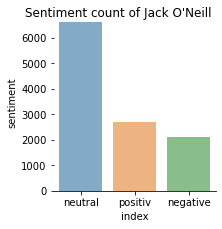

In [137]:
g = sns.catplot(
    data=sentiment_jack, kind="bar",
    x="index", y="sentiment",
    ci=None, alpha=.6, height=3, order=['neutral','positiv','negative']
)
g.despine(left=True)
g.fig.suptitle("Sentiment count of Jack O'Neill")

In [138]:
daniel_jackson= all_scripts[all_scripts.character=='daniel_jackson']
daniel_jackson['text']=daniel_jackson.text.apply(
    lambda x: ' '.join(x))
daniel_jackson['sentiment_score']=daniel_jackson.text.apply(
    lambda x: afn.score(x))
avg_daniel=daniel_jackson.sentiment_score.mean()
avg_daniel

0.05182291666666667

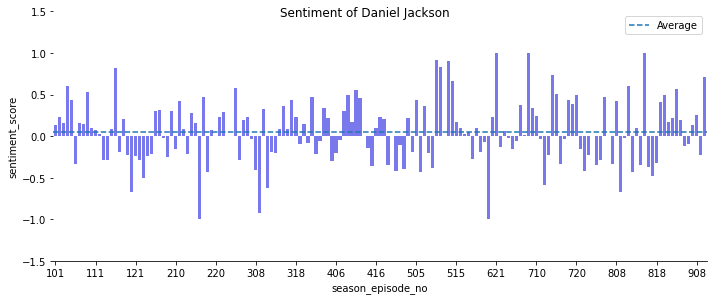

In [139]:
g = sns.catplot(
    data=daniel_jackson, kind="bar",
    x="season_episode_no", y="sentiment_score",
    ci=None, alpha=.6, height=4, estimator=np.mean, aspect=2.5, color="blue"
)
g.despine(left=True)
g.fig.suptitle("Sentiment of Daniel Jackson")
g.set(ylim=(-1.5, 1.5))
ax1, = g.axes[0]

ax1.axhline(avg_daniel, ls='--')
#ax1.axhline(0, ls='-', c='grey')
plt.legend(labels=["Average"])

xticks=ax1.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%10==0:
        xticks[i].set_visible(True)
    else:
        xticks[i].set_visible(False)

plt.show()

Text(0.5, 0.98, 'Sentiment count of Daniel Jackson')

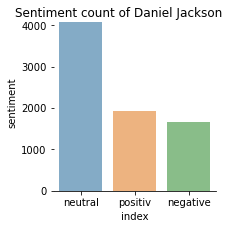

In [140]:
daniel_jackson['sentiment']=daniel_jackson.sentiment_score.apply(
    lambda x: set_sentiment(x))
sentiment_daniel_jackson=daniel_jackson.sentiment.value_counts().reset_index()
g = sns.catplot(
    data=sentiment_daniel_jackson, kind="bar",
    x="index", y="sentiment",
    ci=None, alpha=.6, height=3, order=['neutral','positiv','negative']
)
g.despine(left=True)
g.fig.suptitle("Sentiment count of Daniel Jackson")

In [141]:
samantha_carter= all_scripts[all_scripts.character=='samantha_carter']
samantha_carter['text']=samantha_carter.text.apply(
    lambda x: ' '.join(x))
samantha_carter['sentiment_score']=samantha_carter.text.apply(
    lambda x: afn.score(x))
avg_sam=samantha_carter.sentiment_score.mean()
avg_sam

0.09671513193322563

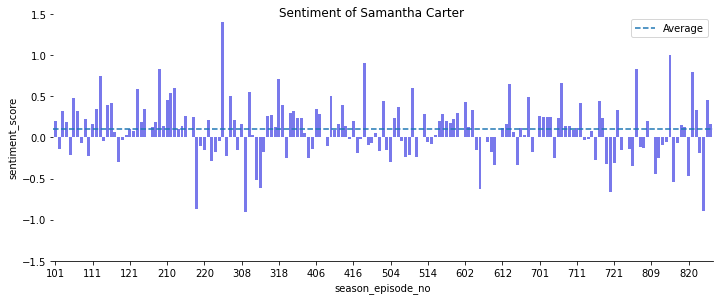

In [142]:
g = sns.catplot(
    data=samantha_carter, kind="bar",
    x="season_episode_no", y="sentiment_score",
    ci=None, alpha=.6, height=4, estimator=np.mean, aspect=2.5, color="blue"
)
g.despine(left=True)
g.fig.suptitle("Sentiment of Samantha Carter")
g.set(ylim=(-1.5, 1.5))
ax1, = g.axes[0]

ax1.axhline(avg_sam, ls='--')
#ax1.axhline(0, ls='-', c='grey')
plt.legend(labels=["Average"])


xticks=ax1.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%10==0:
        xticks[i].set_visible(True)
    else:
        xticks[i].set_visible(False)

plt.show()

Text(0.5, 0.98, 'Sentiment count of Samantha Carter')

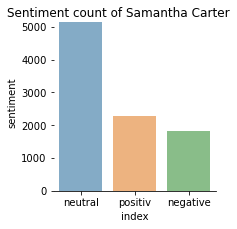

In [143]:
samantha_carter['sentiment']=samantha_carter.sentiment_score.apply(
    lambda x: set_sentiment(x))
sentiment_samantha_carter=samantha_carter.sentiment.value_counts().reset_index()
g = sns.catplot(
    data=sentiment_samantha_carter, kind="bar",
    x="index", y="sentiment",
    ci=None, alpha=.6, height=3, order=['neutral','positiv','negative']
)
g.despine(left=True)
g.fig.suptitle("Sentiment count of Samantha Carter")

In [144]:
teal_c= all_scripts[all_scripts.character=='teal_c']
teal_c['text']=teal_c.text.apply(lambda x: ' '.join(x))
teal_c['sentiment_score']=teal_c.text.apply(lambda x: afn.score(x))
avg_teal_c=teal_c.sentiment_score.mean()
avg_teal_c

-0.1487846795973484

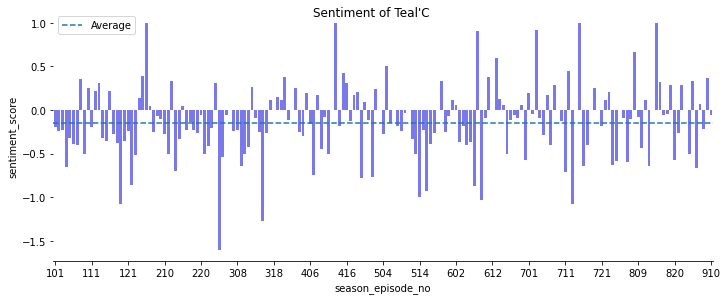

In [145]:
g = sns.catplot(
    data=teal_c, kind="bar",
    x="season_episode_no", y="sentiment_score",
    ci=None, alpha=.6, height=4, estimator=np.mean, aspect=2.5, color="blue"
)
g.despine(left=True)
g.fig.suptitle("Sentiment of Teal'C")
ax1, = g.axes[0]

ax1.axhline(avg_teal_c, ls='--')
#ax1.axhline(0, ls='-', c='grey')
plt.legend(labels=["Average"])


xticks=ax1.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%10==0:
        xticks[i].set_visible(True)
    else:
        xticks[i].set_visible(False)

plt.show()

Text(0.5, 0.98, "Sentiment count of Teal'C")

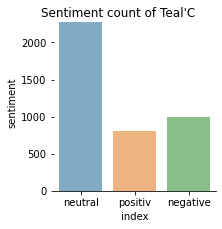

In [146]:
teal_c['sentiment']=teal_c.sentiment_score.apply(lambda x: set_sentiment(x))
sentiment_teal_c=teal_c.sentiment.value_counts().reset_index()
g = sns.catplot(
    data=sentiment_teal_c, kind="bar",
    x="index", y="sentiment",
    ci=None, alpha=.6, height=3, order=['neutral','positiv','negative']
)
g.despine(left=True)
g.fig.suptitle("Sentiment count of Teal'C")

In [147]:
hammond= all_scripts[all_scripts.character=='hammond']
hammond['text']=hammond.text.apply(lambda x: ' '.join(x))
hammond['sentiment_score']=hammond.text.apply(lambda x: afn.score(x))
avg_hammond=hammond.sentiment_score.mean()
avg_hammond

0.11444408216498207

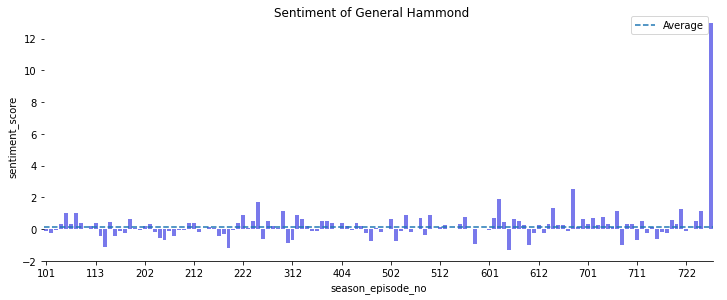

In [148]:
g = sns.catplot(
    data=hammond, kind="bar",
    x="season_episode_no", y="sentiment_score",
    ci=None, alpha=.6, height=4, estimator=np.mean, aspect=2.5, color="blue"
)
g.despine(left=True)
g.fig.suptitle("Sentiment of General Hammond")
ax1, = g.axes[0]

ax1.axhline(avg_hammond, ls='--')
#ax1.axhline(0, ls='-', c='grey')
plt.legend(labels=["Average"])

xticks=ax1.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%10==0:
        xticks[i].set_visible(True)
    else:
        xticks[i].set_visible(False)

plt.show()

In [149]:
hammond.text.iloc[3066]

'in my many years of service i have met with many men and women in uniform around the world active guard and reserve both on the front lines and those here at home and then as nowi am continually amazed by your couragededication and patriotismour airmensoldierssailors and marines are symbols of the pride and strength of this nation be proud of what you doyou make your nation stronger and our world safer thank you'

In [150]:
hammond.tail(10)

,character,text,season,episode,word_count,episode_str,season_episode_no,sentiment_score
314,hammond,we are assembling a team as we speak,8,19,8,19,819,0.0
316,hammond,im sorry doctor jackson but neither you nor do...,8,19,52,19,819,1.0
2,hammond,im aware of that,8,20,4,20,820,0.0
4,hammond,neither of you have had any military training ...,8,20,22,20,820,0.0
6,hammond,look im sorry he reaches an elevator and swipe...,8,20,27,20,820,0.0
17,hammond,im not sure he turns to a couple of airmen who...,8,20,23,20,820,1.0
40,hammond,good luck and godspeed he leaves the room,8,20,8,20,820,6.0
45,hammond,well according to the tape it worked for eight...,8,20,10,20,820,0.0
13,hammond,on radio sg1 this is hammond do you read,9,1,9,01,901,0.0
59,hammond,in my many years of service i have met with ma...,9,10,74,10,910,13.0


Text(0.5, 0.98, 'Sentiment count of General Hammond')

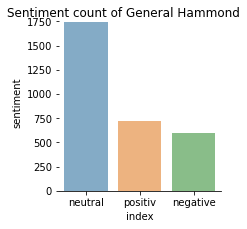

In [151]:
hammond['sentiment']=hammond.sentiment_score.apply(
    lambda x: set_sentiment(x))
sentiment_hammond=hammond.sentiment.value_counts().reset_index()
g = sns.catplot(
    data=sentiment_hammond, kind="bar",
    x="index", y="sentiment",
    ci=None, alpha=.6, height=3, order=['neutral','positiv','negative']
)
g.despine(left=True)
g.fig.suptitle("Sentiment count of General Hammond")

In [152]:
jonas_quinn= all_scripts[all_scripts.character=='jonas']
jonas_quinn['text']=jonas_quinn.text.apply(lambda x: ' '.join(x))
jonas_quinn['sentiment_score']=jonas_quinn.text.apply(lambda x: afn.score(x))
avg_jonas=jonas_quinn.sentiment_score.mean()
avg_jonas

0.20594059405940593

In [153]:
outlier_jonas=jonas_quinn.loc[jonas_quinn['season_episode_no'] == 609]
outlier_jonas.text.iloc[0]

'well colonel at least let me rejoin the team for you itll be an incoming wormhole from earth what risk could there be'

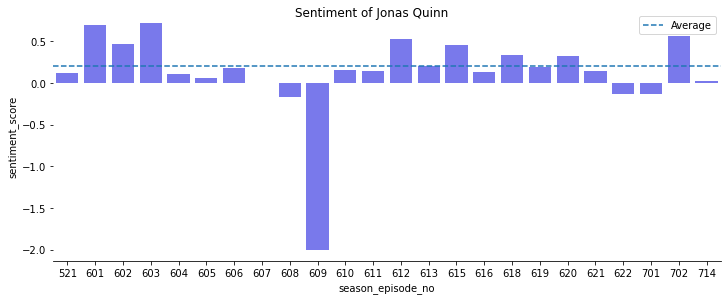

In [154]:
g = sns.catplot(
    data=jonas_quinn, kind="bar",
    x="season_episode_no", y="sentiment_score",
    ci=None, alpha=.6, height=4, estimator=np.mean, aspect=2.5, color="blue"
)
g.despine(left=True)
g.fig.suptitle("Sentiment of Jonas Quinn")
ax1, = g.axes[0]

ax1.axhline(avg_jonas, ls='--')
#ax1.axhline(0, ls='-', c='grey')
plt.legend(labels=["Average"])



Text(0.5, 0.98, 'Sentiment count of Jonas Quinn')

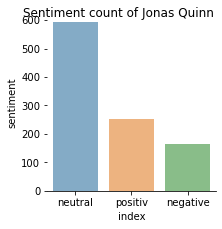

In [155]:
jonas_quinn['sentiment']=jonas_quinn.sentiment_score.apply(
    lambda x: set_sentiment(x))
sentiment_jonas_quinn=jonas_quinn.sentiment.value_counts().reset_index()
g = sns.catplot(
    data=sentiment_jonas_quinn, kind="bar",
    x="index", y="sentiment",
    ci=None, alpha=.6, height=3, order=['neutral','positiv','negative']
)
g.despine(left=True)
g.fig.suptitle("Sentiment count of Jonas Quinn")

In [156]:
cameron_mitchell= all_scripts[all_scripts.character=='cameron']
cameron_mitchell['text']=cameron_mitchell.text.apply(
    lambda x: ' '.join(x))
cameron_mitchell['sentiment_score']=cameron_mitchell.text.apply(
    lambda x: afn.score(x))
avg_cam=cameron_mitchell.sentiment_score.mean()
avg_cam

0.2641509433962264

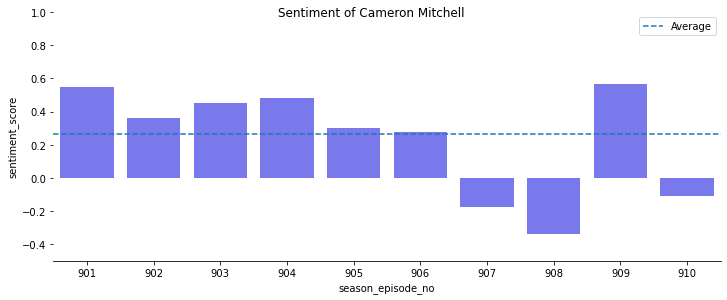

In [157]:
g = sns.catplot(
    data=cameron_mitchell, kind="bar",
    x="season_episode_no", y="sentiment_score",
    ci=None, alpha=.6, height=4, estimator=np.mean, aspect=2.5, color="blue"
)
g.despine(left=True)
g.fig.suptitle("Sentiment of Cameron Mitchell")
g.set(ylim=(-0.5, 1))
ax1, = g.axes[0]

ax1.axhline(avg_cam, ls='--')
#ax1.axhline(0, ls='-', c='grey')
plt.legend(labels=["Average"])


Text(0.5, 0.98, 'Sentiment count of Cameron Mitchell')

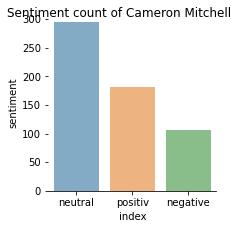

In [158]:
cameron_mitchell['sentiment']=cameron_mitchell.sentiment_score.apply(
    lambda x: set_sentiment(x))
sentiment_cameron_mitchell=cameron_mitchell.sentiment.value_counts().reset_index()
g = sns.catplot(
    data=sentiment_cameron_mitchell, kind="bar",
    x="index", y="sentiment",
    ci=None, alpha=.6, height=3, order=['neutral','positiv','negative']
)
g.despine(left=True)
g.fig.suptitle("Sentiment count of Cameron Mitchell")

In [159]:
vala_mal_doran= all_scripts[all_scripts.character=='vala']
vala_mal_doran['text']=vala_mal_doran.text.apply(
    lambda x: ' '.join(x))
vala_mal_doran['sentiment_score']=vala_mal_doran.text.apply(
    lambda x: afn.score(x))
avg_vala=vala_mal_doran.sentiment_score.mean()
avg_vala

0.07422680412371134

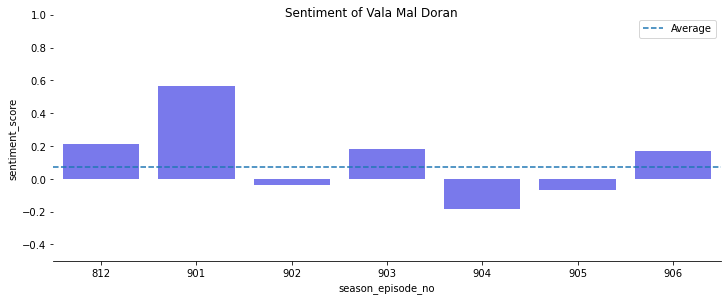

In [160]:
g = sns.catplot(
    data=vala_mal_doran, kind="bar",
    x="season_episode_no", y="sentiment_score",
    ci=None, alpha=.6, height=4, estimator=np.mean, aspect=2.5, color="blue"
)
g.despine(left=True)
g.fig.suptitle("Sentiment of Vala Mal Doran")
g.set(ylim=(-0.5, 1))
ax1, = g.axes[0]

ax1.axhline(avg_vala, ls='--')
#ax1.axhline(0, ls='-', c='grey')
plt.legend(labels=["Average"])


Text(0.5, 0.98, 'Sentiment count of Vala Mal Doran')

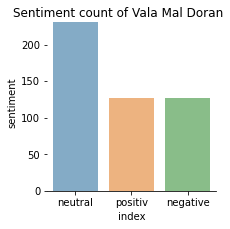

In [161]:
vala_mal_doran['sentiment']=vala_mal_doran.sentiment_score.apply(
    lambda x: set_sentiment(x))
sentiment_vala_mal_doran=vala_mal_doran.sentiment.value_counts().reset_index()
g = sns.catplot(
    data=sentiment_vala_mal_doran, kind="bar",
    x="index", y="sentiment",
    ci=None, alpha=.6, height=3, order=['neutral','positiv','negative']
)
g.despine(left=True)
g.fig.suptitle("Sentiment count of Vala Mal Doran")

In [162]:
hank_landry= all_scripts[all_scripts.character=='landry']
hank_landry['text']=hank_landry.text.apply(
    lambda x: ' '.join(x))
hank_landry['sentiment_score']=hank_landry.text.apply(
    lambda x: afn.score(x))
avg_hank_landry=hank_landry.sentiment_score.mean()
avg_hank_landry

0.24629080118694363

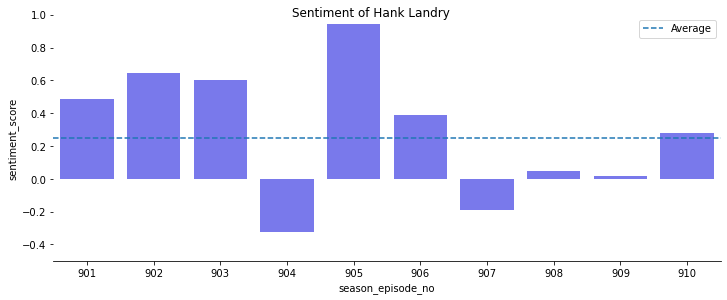

In [163]:
g = sns.catplot(
    data=hank_landry, kind="bar",
    x="season_episode_no", y="sentiment_score",
    ci=None, alpha=.6, height=4, estimator=np.mean, aspect=2.5, color="blue"
)
g.despine(left=True)
g.fig.suptitle("Sentiment of Hank Landry")
g.set(ylim=(-0.5, 1))
ax1, = g.axes[0]

ax1.axhline(avg_hank_landry, ls='--')
#ax1.axhline(0, ls='-', c='grey')

plt.legend(labels=["Average"])

Text(0.5, 0.98, 'Sentiment count of Hank Landry')

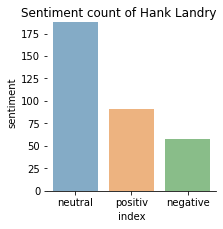

In [164]:
hank_landry['sentiment']=hank_landry.sentiment_score.apply(
    lambda x: set_sentiment(x))
sentiment_hank_landry=hank_landry.sentiment.value_counts().reset_index()
g = sns.catplot(
    data=sentiment_hank_landry, kind="bar",
    x="index", y="sentiment",
    ci=None, alpha=.6, height=3, order=['neutral','positiv','negative']
)
g.despine(left=True)
g.fig.suptitle("Sentiment count of Hank Landry")